In [2]:
import pandas as pd

In [3]:
results = pd.read_csv('../Forecast_synth/findings/ESN_MacGL_static_noshock_grid_specrad_X_statenoise_ressize=900.csv')

In [4]:
results

,Unnamed: 0,Reservoir_Size,State_noise,Sprectral_radius,Rmse_val_mean,Rmse_val_std,Rmse_val_min,Rmse_val_max,Rmse_tr_mean,Rmse_tr_std
0,0,900,0.001000,1.0,5.445833,4.208730,1.542720,12.544902,0.049599,0.000021
1,1,900,0.027263,1.0,0.484474,0.150188,0.313734,0.687633,0.049599,0.000076
2,2,900,0.053526,1.0,0.116729,0.075477,0.035997,0.217810,0.049599,0.000176
3,3,900,0.079789,1.0,0.036481,0.008397,0.026156,0.049516,0.049599,0.000351
4,4,900,0.106053,1.0,0.033257,0.003187,0.028292,0.036816,0.049599,0.000356
...,...,...,...,...,...,...,...,...,...,...
595,595,900,0.394947,2.5,0.051418,0.001044,0.050011,0.052544,0.049599,0.000460
596,596,900,0.421211,2.5,0.051777,0.000740,0.051033,0.052655,0.049599,0.000255
597,597,900,0.447474,2.5,0.053049,0.001763,0.050990,0.055835,0.049599,0.000535
598,598,900,0.473737,2.5,0.052408,0.000885,0.051011,0.053274,0.049599,0.000434


(-0.01, 0.3)

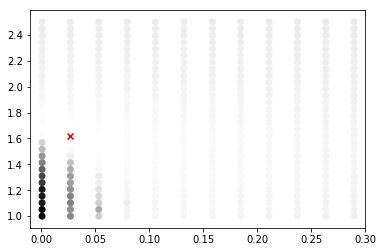

In [8]:
import matplotlib.pyplot as plt
import numpy as np
plt.scatter(results['State_noise'].values, 
            results['Sprectral_radius'], 
            
            c= (np.log(results['Rmse_val_mean'])), 
            
            cmap='Greys')


best_x, best_y = results[results.index==results['Rmse_val_mean'].idxmin()][['State_noise','Sprectral_radius' ]].values[0]

plt.scatter([best_x],[best_y], c='r',marker='x' ) 

# best_x, best_y = results[results.index==results['Rmse_val_min'].idxmin()][['State_noise','Sprectral_radius' ]].values[0]

# plt.scatter([best_x],[best_y], c='b',marker='x' ) 

plt.xlim(-0.01, 0.3)
# plt.ylim(0.8, 1.8)


In [75]:
results[results.index==results['Rmse_val_min'].idxmin()]

,Unnamed: 0,Reservoir_Size,State_noise,Sprectral_radius,Rmse_val_mean,Rmse_val_std,Rmse_val_min,Rmse_val_max,Rmse_tr_mean,Rmse_tr_std
241,241,900,0.027263,1.62069,0.020287,0.001803,0.017949,0.022954,0.049599,0.000849


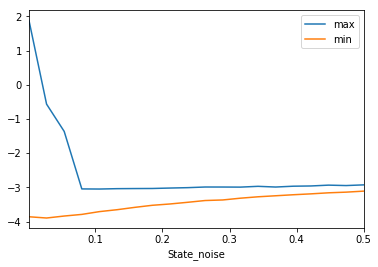

In [16]:
results.groupby('State_noise')['Rmse_val_mean'].agg(['max', 'min']).apply(np.log).plot()